# 阅读笔记

** 作者：方跃文 **

** Email: fyuewen@gmail.com **

** 时间：始于2017年9月12日， 结束写作于 **

** 第四章笔记始于2018年1月6日，结束于2018年_____**



# 第五章 pandas 入门

** 时间： 2017年1月6日清晨**

panas 是原书作者Wes Mckinney主要想讨论的library，毕竟Mckinney本人就是pandas的开发者。pandas可以帮助数据分析工作，特别是在处理高级数据结构时候，pandas可以简化这些复杂的工作。pandas是基于NumPy构建的，因此会让以NumPy为中心的应用变得更加简单。尽管Pandas的构建哲学基于Numpy，但是两者也是有一处显著差别的，即
**
While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.**

Pandas其实是Mckinney在AQR量化投资管理公司任职时候开始编写的，最初他是为了满足工作需求才编写的。之后Pandas不断壮大，使得功能越来越丰富。不过Mckinney也认为后来的Pandas有点违背了自己的初衷，因为他其实是希望它能保留简介性和易用性。

在本书中，我们做如下的约定，即

In [1]:
from pandas import Series, DataFrame

In [2]:
import pandas as pd

这有点像之前那样的，我们约定 np 代表 numpy。因为 Series 和 DataFrame 用的次数非常多，所以将其引入命名空间会更加方便

## Pandas的数据结构介绍

要想顺畅得使用pandas，就必须熟悉它的两个主要数据结构：Series 和 DataFrame。虽然它们并不能解决所有问题，不过它们为大多数应用提供了一种可靠的，易于使用的基础。

### Series

Series 是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成。仅有一组数据即可产生最简单的Series。

例如：

In [2]:
from pandas import Series

obj = Series([4, 5, 2, -4])

In [3]:
obj

0    4
1    5
2    2
3   -4
dtype: int64

In [7]:
obj2=obj+obj
obj2

0     8
1    10
2     4
3    -8
dtype: int64

从上面我们可以看到，Series 的字符串表现形式为：索引在左边，值在右边。因为我们上面没有为数据指定特殊的索引，所以系统会自动创建一个 0 到 N-1 （N为数据的长度）的整数型索引。你可以通过 Series 的 values 和 index 属性获取数组表示形式和索引对象：

In [6]:
obj.values

array([ 4,  5,  2, -4])

In [7]:
obj.index # 注意，如果使用python 2，显示的结果可能在形式上有点不同。

RangeIndex(start=0, stop=4, step=1)

大部分情况下，我们更希望去定制索引，以方便我们的使用。例如

In [9]:
obj2 = Series([4, 5, 2 ,-4], index=['d', 'b', 
                                    'a', 'c'])

In [10]:
obj2.values

array([ 4,  5,  2, -4])

In [11]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [12]:
obj2['a']

2

我们可以看到上面，与普通的numpy数组相比，我们可以通过索引的方式选取Series中的单个或者一组值。

In [14]:
obj2[['a', 'b']]

a    2
b    5
dtype: int64

## Visualization

由于近来在处理计算材料的结果时用到了pandas数组的可视化，所以我查阅了pandas网站documentation中可视化的部分，因此在此增加了一个visualization的subsection。

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [16]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(
    '1/1/2000', periods = 1000))

ts = ts.cumsum()

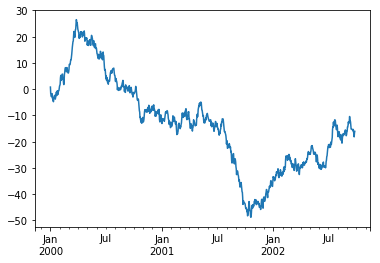

In [17]:
ts.plot()

In [20]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index = ts.index, columns = list('ABCD'))

In [21]:
df = df.cumsum()

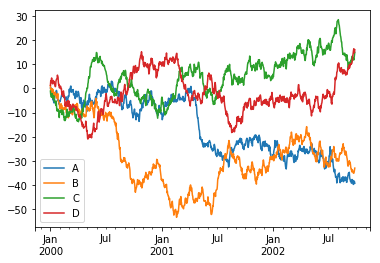

In [22]:
plt.figure(); df.plot();

In [23]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns
                   = ['B', 'C']).cumsum()

In [25]:
df3['A'] = pd.Series(list(range(len(df))))

## Pandas for data analysis | scipy 2017 Tutorial | Dainiel Chen

In 2017, Dainiel Chen gave a very nice presentation in SciPy meeting. I watched his vedio in the (youtube)[https://www.youtube.com/watch?v=oGzU688xCUs], hence I added some note in this section. All the imported files mentioned in this section can be found in Chen's github (repo.)[https://github.com/chendaniely/scipy-2017-tutorial-pandas]. For my convenience, I moved the folder 'data' in his repo to ch02 in my current repo.

In [1]:
import pandas as pd

In [ ]:
pd.